In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time

## Problem 1

In [2]:
returns = pd.read_csv("DailyReturn.csv")

In [3]:
returns

,Unnamed: 0,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,2021/10/21,0.002608,0.001474,0.010897,0.005842,0.032571,0.000825,0.002566,0.003228,0.026648,...,-0.000329,-0.002156,-0.004130,0.010683,0.001944,0.005416,0.009789,0.012832,-0.004696,0.012841
1,2021/10/22,-0.001036,-0.005285,-0.005149,-0.028955,0.017539,-0.030443,-0.029104,-0.050515,0.001498,...,0.015748,0.005984,-0.000207,-0.002181,0.003732,0.003913,-0.002568,-0.010957,0.013526,-0.008040
2,2021/10/25,0.005363,-0.000336,-0.003332,-0.004551,0.126616,-0.000869,0.001068,0.012569,0.019361,...,0.002221,-0.002974,-0.005599,0.011770,0.006395,0.004618,-0.009720,-0.000173,0.002017,0.017145
3,2021/10/26,0.000900,0.004575,0.006426,0.016775,-0.006274,0.013543,0.006478,-0.039186,0.066952,...,-0.002263,0.008121,0.003337,-0.003545,0.000887,-0.118035,0.000476,-0.006752,-0.002013,0.001073
4,2021/10/27,-0.004430,-0.003148,0.042114,0.004864,0.019078,0.049595,0.048367,-0.011368,-0.010762,...,-0.014625,-0.007233,-0.012679,-0.052368,-0.014174,-0.002922,-0.017132,-0.054210,-0.022191,-0.011786
5,2021/10/28,0.009649,0.024992,0.003651,0.015941,0.037751,-0.002520,-0.002039,0.015054,0.020040,...,0.000658,0.009273,-0.061474,0.011733,0.008537,0.001360,-0.000223,-0.000369,0.013966,0.009913
6,2021/10/29,0.002029,-0.018156,0.022414,-0.021511,0.034316,0.015064,0.014655,0.020983,0.025099,...,-0.009481,-0.003445,-0.010543,0.005972,-0.036531,0.002806,-0.008829,0.003503,-0.006574,0.004448
7,2021/11/1,0.001720,-0.005607,-0.006785,-0.016107,0.084910,-0.030727,-0.030326,0.019810,0.010169,...,-0.001848,0.002799,-0.001360,0.008646,0.011714,-0.004183,0.008757,0.019475,0.015125,0.017713
8,2021/11/2,0.004043,0.007116,0.011416,-0.001615,-0.030275,0.013488,0.014530,-0.005758,0.022225,...,-0.002564,0.007388,0.002270,0.016858,0.003961,-0.013961,0.015835,0.001802,-0.002018,0.010053
9,2021/11/3,0.006105,0.009799,0.002611,0.021508,0.035717,0.008014,0.006355,0.010790,0.007462,...,0.012375,0.015971,0.018347,0.004833,0.022914,0.015445,-0.002898,0.007375,0.013064,0.016488


In [4]:
returns.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
def exp_weighted_cov(returns, lambd):
    t = len(returns)
    weight = np.zeros(t)
    for i in range(1,t+1):
        weight[t-i] = (1-lambd)*lambd**(i-1)
    weight = weight/sum(weight)
    returns = returns - returns.mean()
    return returns.T @ (np.diag(weight) @ returns)

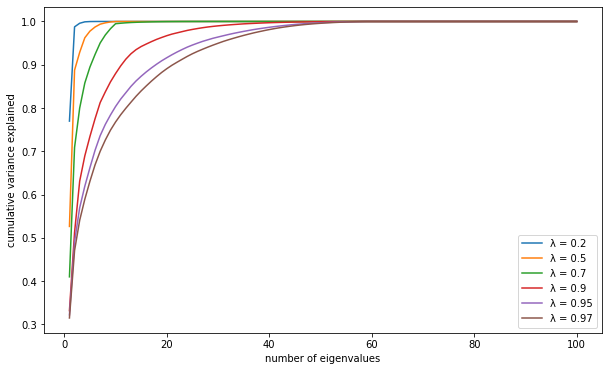

In [7]:
def pca_var_explained(cov, num_vals):
    vals, vecs = np.linalg.eigh(cov)
    vals = vals[::-1]
    vals = [val for val in vals if val >=1e-9]
    tot = sum(vals)
    explained = sum(vals[:num_vals])
    return explained/tot

lambd = [0.2, 0.5, 0.7, 0.9, 0.95, 0.97]
l_master = []
for i in lambd:
    cov_mat = exp_weighted_cov(returns, i)
    explained_vars = [pca_var_explained(cov_mat, j) for j in range(1,len(cov_mat))] # len(cov_mat): total num of eigenvals
    l_master.append(explained_vars)

plt.figure(figsize=(10,6))
for i in range(len(l_master)):
    plt.plot(np.arange(1,len(cov_mat)), l_master[i], label="λ = {}".format(lambd[i]))
    plt.xlabel("number of eigenvalues")
    plt.ylabel("cumulative variance explained")
plt.legend()
# plt.savefig('n_eigenvalues_vs_var_exp',facecolor='w',dpi=200)

## Problem 2

In [8]:
def chol_psd(a):
    '''
    Return the cholesky root given a symmetric, PSD matrix
    '''
    a = np.array(a)
    root = np.zeros_like(a)
    for j in range(len(a)):
        for i in range(j,len(a)):
            if i==j:
                root[i,j] = a[i,j]-np.dot(root[j,:j],root[j,:j])
                if abs(root[i,j]) <= 1e-9:
                    root[i,j] = 0
                else:
                    root[i,j] = np.sqrt(root[i,j])
            else:
                if root[j,j] == 0:
                    root[i,j] = 0
                else: root[i,j] = (a[i,j]-np.dot(root[i,:j],root[j,:j]))/root[j,j]
    return root

In [9]:
# Rebonato and Jackel
def near_psd(a, epsilon=0.0):
    '''
    Return a near PSD covariance matrix given a non-PSD correlation or covariance matrix
    '''
    cov = False
    for i in np.diag(a):
        if abs(i-1)>=1e-9:
            cov = True
    if cov:
        invStd = np.diag(1.0/np.sqrt(np.diag(a)))
        a = invStd @ a @ invStd
    vals, vecs = np.linalg.eigh(a)
    vals = [val if val>=0.0 else epsilon for val in vals]
    T = 1.0/((np.square(vecs) @ vals))
    B = np.diag(np.sqrt(T)) @ vecs @ np.diag(np.sqrt(vals))
    res = B@B.T
    if cov:
        std = np.diag(1.0/np.diag(invStd))
        res = std @ res @ std
    return res

<pre>
Higham
    1. A -> S: Ps(A)
    2. △S = Ps(A) - A
    3. Ps(A) -> U: Pu(Ps(A))
    4. ||A-Pu(Ps(A))||F
    *weight needs to be considered when deconstructed/constructed (p330, 1.2)

In [10]:
def Ps(A, w):
    A = np.sqrt(w)@A@np.sqrt(w)
    vals, vecs = np.linalg.eigh(A)
    vals = np.clip(vals, a_min=0, a_max=None)
    return np.sqrt(w)@(vecs@np.diag(vals)@vecs.T)@np.sqrt(w)

def Pu(A): # paper p336, 3.2
    res = A.copy()
    for i in range(len(A)):
        res[i][i]=1
    return res

def frobenius(a, pu_ps_a): # class notes p9
    d = pu_ps_a - a
    s = 0
    for i in range(len(d)):
        for j in range(len(d)):
            s+=d[i][j]**2
    return s

def higham_psd(A, w, max_iter=1000,tol=1e-9, print_dif=False):
    '''
    Return a near PSD corr matrix given a non-PSD corr matrix
    
    Parameters:
    - A: cov matrix
    - w: a diagonal matrix, set to identity matrix if unweighted
    - max_iter: cap on the iterations
    - tol: the norm difference at which the alternative projections are stopped
    - print_dif: print norm differences for each iteration
    '''
    prev_norm = float("inf")
    y = A.copy()
    delta_s = np.zeros(A.shape)
    for i in range(max_iter):
        r = y-delta_s
        x = Ps(r,w)
        delta_s = x-r
        y = Pu(x)
        norm = frobenius(A,y)
        if print_dif:
            print(abs(norm-prev_norm))
        if abs(norm-prev_norm)<tol:
            break
        else:
            prev_norm = norm
    return y

In [63]:
def non_psd(n=500):
    sigma = np.full((n,n),0.9)
    for i in range(n):
        sigma[i, i] = 1.0
    sigma[0, 1] = 0.7357
    sigma[1, 0] = 0.7357
    return sigma

def is_psd(mat):
    return np.all(np.linalg.eigvals(mat) > -1e-8)

In [64]:
sigma = non_psd()
print("Original: ", is_psd(sigma))
print("Fixed using near_psd(): ", is_psd(near_psd(sigma)))
print("Fixed using higham_psd(): ", is_psd(higham_psd(sigma, np.identity(len(sigma)))))

Original:  False
Fixed using near_psd():  True
Fixed using higham_psd():  True


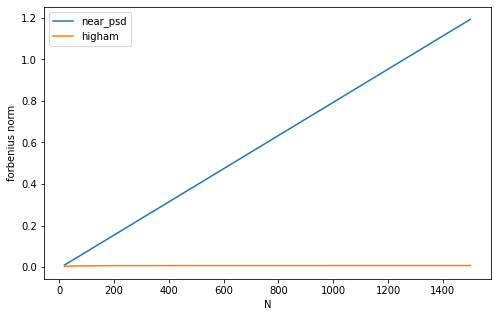

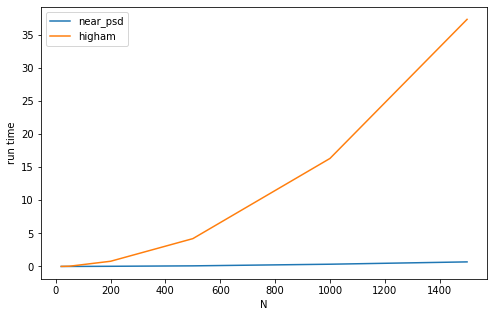

In [53]:
ns = [20, 50, 200, 500, 1000, 1500]
norm_BJ, norm_H = [],[]
time_BJ, time_H = [],[]

for n in ns:
    sigma = non_psd(n)
    start = time.time()
    psd = near_psd(sigma)
    end = time.time()
    norm_BJ.append(frobenius(sigma, psd))
    time_BJ.append(end-start)
    
for n in ns:
    sigma = non_psd(n)
    start = time.time()
    psd = higham_psd(sigma, np.identity(len(sigma)))
    end = time.time()
    norm_H.append(frobenius(sigma, psd))
    time_H.append(end-start)

plt.figure(figsize=(8,5))
plt.plot(ns,norm_BJ,label="near_psd")
plt.plot(ns,norm_H,label="higham")
plt.xlabel("N")
plt.ylabel("forbenius norm")
plt.legend()
# plt.savefig("norm_vs_N.png",facecolor='w',dpi=150)

plt.figure(figsize=(8,5))
plt.plot(ns,time_BJ,label="near_psd")
plt.plot(ns,time_H,label="higham")
plt.xlabel("N")
plt.ylabel("run time")
plt.legend()
# plt.savefig("runtime_vs_N.png",facecolor='w',dpi=150)

## Problem 3

In [54]:
def direct_sim(cov,nsim=25000):
    np.random.seed(9)
    return chol_psd(cov)@np.random.normal(size=(len(cov),nsim))

def pca_sim(cov, nsim=25000, var_explained=1-1e-9):
    vals, vecs = np.linalg.eigh(cov)
    tot = sum(vals)
    for i in range(len(vals)):
        i = len(vals)-1-i
        if sum(vals[i:])/tot > var_explained:
            vals = vals[i:]
            vecs = vecs[:,i:]
            break
        if vals[i]<0:
            vals = vals[i+1:]
            vecs = vecs[:,i+1:]
            break
    B = vecs @ np.diag(np.sqrt(vals))
    np.random.seed(9)
    z = np.random.normal(size = (len(vals),nsim))
    return B @ z

In [55]:
def corr(cov):       
    invStd = np.diag(1.0/np.sqrt(np.diag(cov)))
    return invStd @ cov @ invStd
def var(cov):
    return np.diag(cov)
def cov(corr, var):
    std = np.diag(np.sqrt(var))
    return std@corr@std

p_corr = corr(np.cov(returns.T))
p_var = var(np.cov(returns.T))
ew_var = var(exp_weighted_cov(returns, 0.97))
ew_corr = corr(exp_weighted_cov(returns, 0.97))

cov1 = cov(p_corr, p_var)
cov2 = cov(p_corr, ew_var)
cov3 = cov(ew_corr, p_var)
cov4 = cov(ew_corr, ew_var)

In [56]:
pca_var = [1.,0.75,0.5]
norms, times = [], []
covs = [cov1,cov2,cov3,cov4]

for i in covs:
    start = time.time()
    sim = direct_sim(i)
    end = time.time()
    norms.append(frobenius(np.cov(sim), i))
    times.append(end-start)

for i in pca_var:
    for j in covs:
        start = time.time()
        sim = pca_sim(j,var_explained=i)
        end = time.time()
        norms.append(frobenius(np.cov(sim),j))
        times.append(end-start)

norms_split = [[] for _ in range(4)]
for i, v in enumerate(norms):
    norms_split[i%4].append(v)
norms = norms_split

times_split = [[] for _ in range(4)]
for i, v in enumerate(times):
    times_split[i%4].append(v)
times = times_split

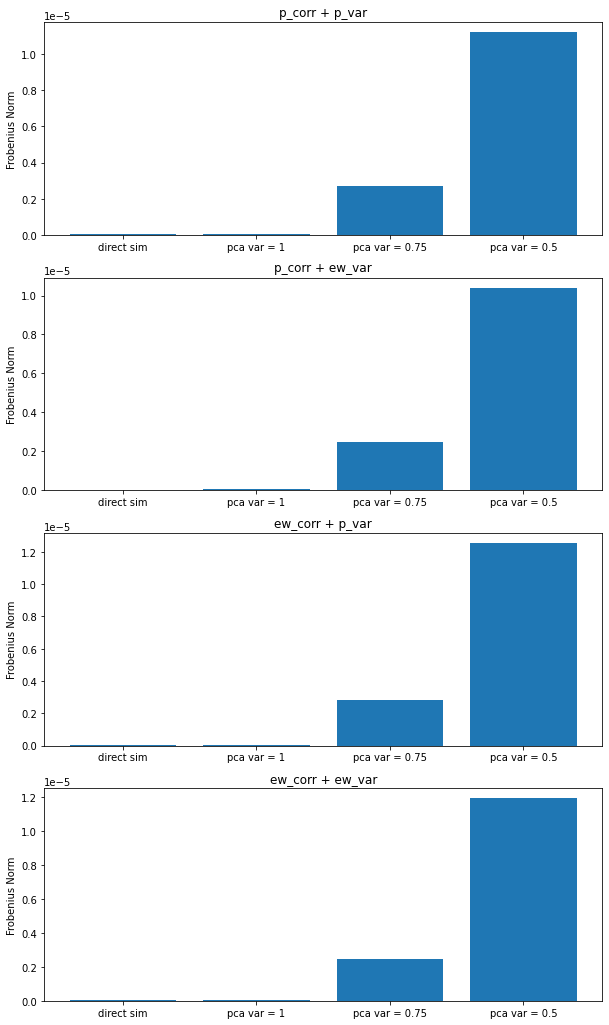

In [57]:
cov_titles = ['p_corr + p_var', 'p_corr + ew_var', 'ew_corr + p_var', 'ew_corr + ew_var']
pca_var_labels = ['direct sim','pca var = 1','pca var = 0.75','pca var = 0.5']
fig, axs = plt.subplots(4, 1, figsize=(10, 18))
for i, ax in enumerate(axs):
    ax.bar(pca_var_labels, norms[i])
    ax.set_title(cov_titles[i])
    ax.set(ylabel='Frobenius Norm')
# plt.savefig('frobenius_norm_vs_sim.png',facecolor='w',dpi=300)
plt.show()

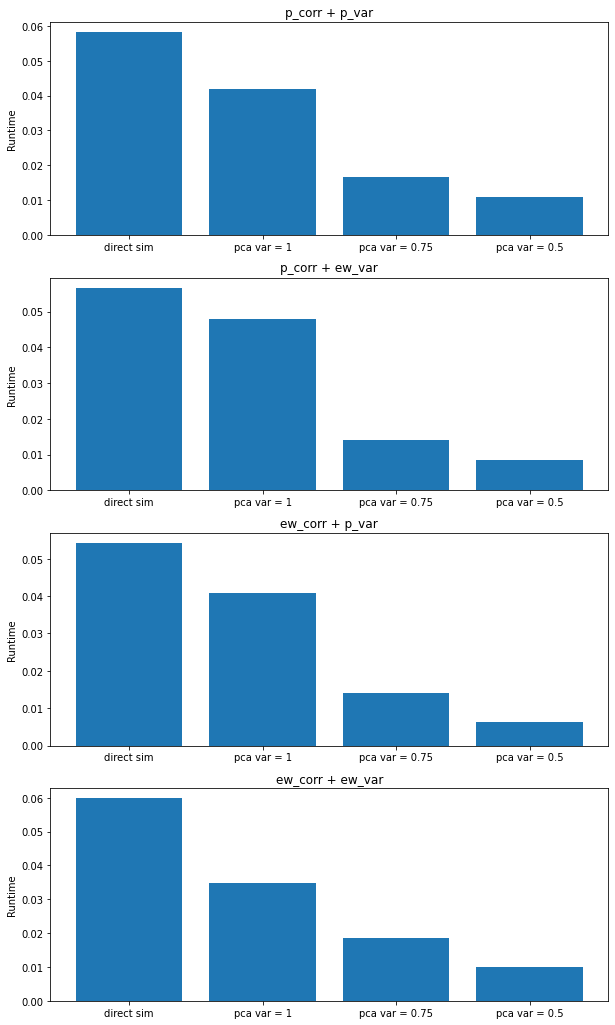

In [60]:
cov_titles = ['p_corr + p_var', 'p_corr + ew_var', 'ew_corr + p_var', 'ew_corr + ew_var']
pca_var_labels = ['direct sim','pca var = 1','pca var = 0.75','pca var = 0.5']
fig, axs = plt.subplots(4, 1, figsize=(10, 18))
for i, ax in enumerate(axs):
    ax.bar(pca_var_labels, times[i])
    ax.set_title(cov_titles[i])
    ax.set(ylabel='Runtime')
# plt.savefig('runtime_vs_sim.png',facecolor='w',dpi=300)
plt.show()

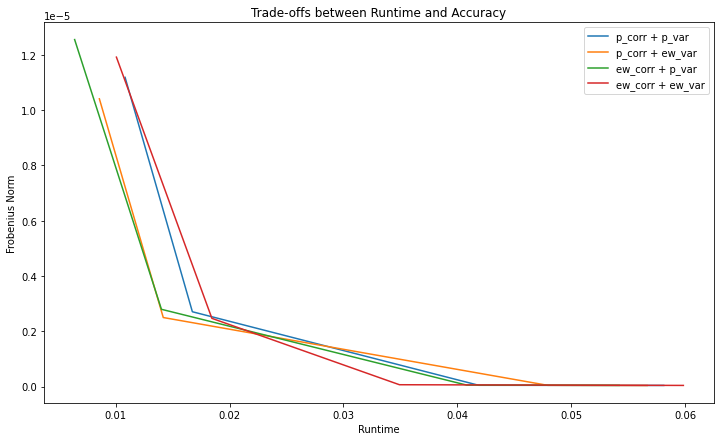

In [61]:
plt.figure(figsize=(12,7))
for i in range(4):
    plt.plot(times[i], norms[i],label=cov_titles[i])
plt.xlabel("Runtime")
plt.ylabel("Frobenius Norm")
plt.title('Trade-offs between Runtime and Accuracy')
plt.legend()
# plt.savefig('frobenius_norm_vs_runtime.png',facecolor='w',dpi=200)